In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects


df = pd.read_csv('c:/Users/44773/Documents/championship_shooting.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Rk           Player    Pos         Squad     Age  Born   90s  Gls  Sh  SoT  \
0   1       Igor Tyjon     FW     Blackburn  17-000  2008   0.0    0   0    0   
1   2  Samuel Chambers     FW  Leeds United  17-214  2007   0.2    0   0    0   
2   3    Amin Nabizada     MF       Watford  17-272  2007   0.2    0   0    0   
3   4       Chris Rigg  MF,FW    Sunderland  17-275  2007  27.6    4  43   13   
4   5     Ronan Kpakio     DF  Cardiff City  17-299  2007   0.4    0   0    0   

   ...  G/SoT  Dist  FK  PK  PKatt   xG  npxG  npxG/Sh  G-xG  np:G-xG  
0  ...    NaN   NaN   0   0      0  0.0   0.0      NaN   0.0      0.0  
1  ...    NaN   NaN   0   0      0  0.0   0.0      NaN   0.0      0.0  
2  ...    NaN   NaN   0   0      0  0.0   0.0      NaN   0.0      0.0  
3  ...   0.31  15.8   0   0      0  5.5   5.5     0.13  -1.5     -1.5  
4  ...    NaN   NaN   0   0      0  0.0   0.0      NaN   0.0      0.0  

[5 rows x 24 columns]


In [2]:
df.drop(columns=['Rk', 'Born', 'PKatt'], inplace=True)

In [3]:
df['Age'] = df['Age'].str[:2]

In [4]:
df['Pos'] = df['Pos'].str.split(',')

In [5]:
forwards = df[df['Pos'].apply(lambda x: 'FW' in x)]

In [6]:
chart_data = forwards[forwards['90s']>5][['Player', 'Gls', 'Sh', 'npxG/Sh']]

In [7]:
chart_data

,Player,Gls,Sh,npxG/Sh
3,Chris Rigg,4,43,0.13
11,Frederick Issaka,1,7,0.09
17,Oscar Schwartau,1,20,0.16
20,Tom Watson,2,21,0.07
24,Mamadou Doumbia,0,10,0.13
25,Ben Doak,3,27,0.16
31,Lewis Koumas,3,44,0.11
41,Amario Duberry,1,16,0.06
42,Romain Esse,4,30,0.07
44,Eliezer Mayenda,7,49,0.18


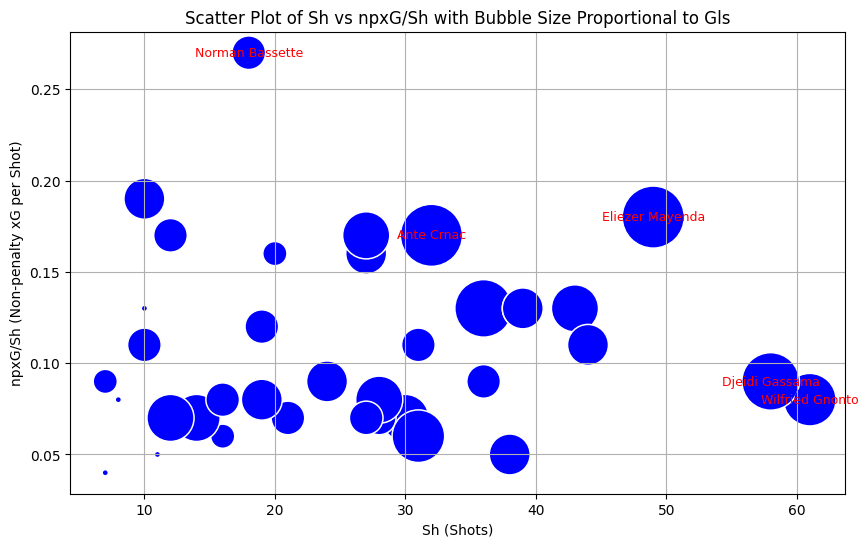

In [8]:
plt.figure(figsize=(10, 6))

# Set bubble sizes proportional to 'Gls' and scale them (you can adjust the scale factor as needed)
bubble_sizes = chart_data['Gls'] * 100  # You can scale this value if the bubbles are too large or small

# Plot the scatter plot
sns.scatterplot(data=chart_data, x='Sh', y='npxG/Sh', size=bubble_sizes, sizes=(20, 2000), legend=None, color='blue')

# List of players to label
highlight_players = ['Ante Crnac', 'Wilfried Gnonto', 'Djeidi Gassama', 'Eliezer Mayenda', 'Norman Bassette']

# Loop through the players and add labels on their bubbles
for player in highlight_players:
    player_data = chart_data[chart_data['Player'] == player]
    # Plot the bubble for the player
    plt.scatter(player_data['Sh'], player_data['npxG/Sh'], s=player_data['Gls'] * 100, color='blue')
    
    # Add label for each highlighted player on the bubble
    plt.text(player_data['Sh'].values[0], player_data['npxG/Sh'].values[0], player, 
             horizontalalignment='center', verticalalignment='center', fontsize=9, color='red')

# Customize the plot
plt.title('Scatter Plot of Sh vs npxG/Sh with Bubble Size Proportional to Gls')
plt.xlabel('Sh (Shots)')
plt.ylabel('npxG/Sh (Non-penalty xG per Shot)')
plt.grid(True)

# Show the plot
plt.show()



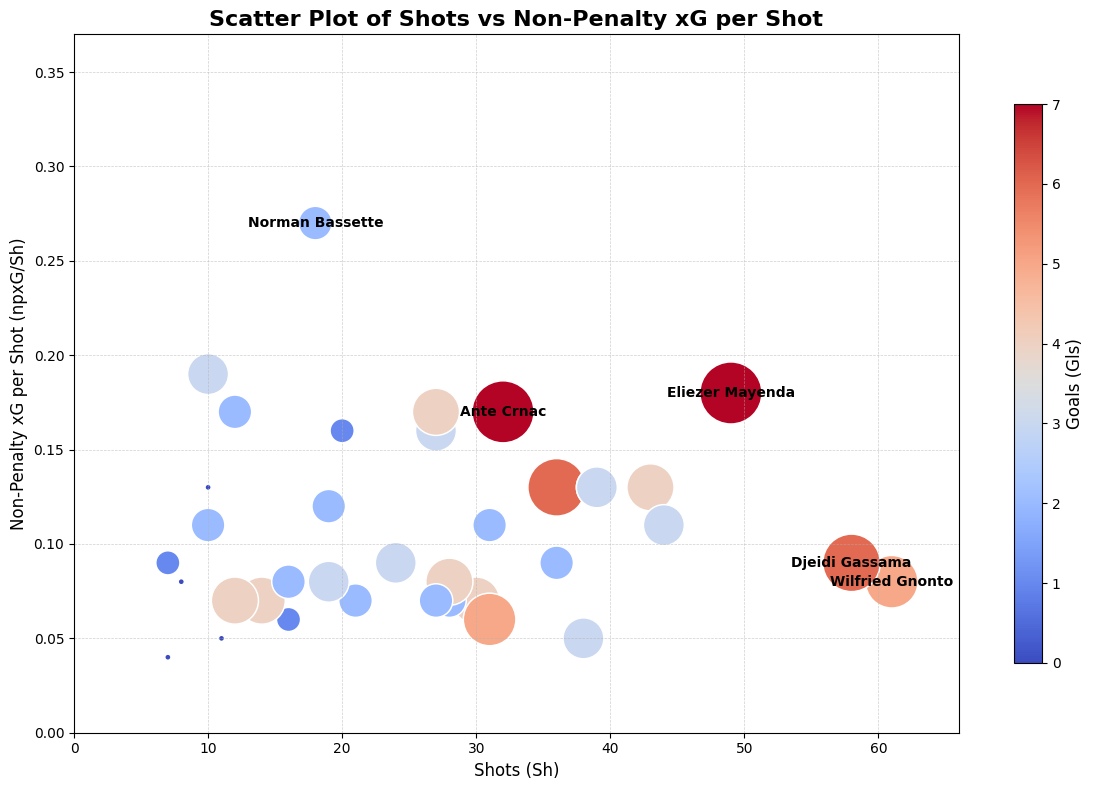

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Set bubble sizes proportional to 'Gls' and scale them
bubble_sizes = chart_data['Gls'] * 100  # Scale the bubbles

# Create the scatter plot with a color palette for better aesthetics
scatter = sns.scatterplot(data=chart_data, x='Sh', y='npxG/Sh', size=bubble_sizes, sizes=(20, 2000), hue='Gls', palette='coolwarm', legend=None)

# Highlight specific players
highlight_players = ['Ante Crnac', 'Wilfried Gnonto', 'Djeidi Gassama', 'Eliezer Mayenda', 'Norman Bassette']

# Loop through the players and add labels on their bubbles
for player in highlight_players:
    player_data = chart_data[chart_data['Player'] == player]
    
    # Add label for each highlighted player on the bubble
    plt.text(player_data['Sh'].values[0], player_data['npxG/Sh'].values[0], player, 
             horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', fontweight='bold')

# Create the colorbar
norm = mpl.colors.Normalize(vmin=chart_data['Gls'].min(), vmax=chart_data['Gls'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # To avoid a warning

# Add colorbar with a specified axis
cbar = plt.colorbar(sm, ax=plt.gca(), shrink=0.8)
cbar.set_label('Goals (Gls)', fontsize=12)

# Customize the plot
plt.title('Scatter Plot of Shots vs Non-Penalty xG per Shot', fontsize=16, fontweight='bold')
plt.xlabel('Shots (Sh)', fontsize=12)
plt.ylabel('Non-Penalty xG per Shot (npxG/Sh)', fontsize=12)

# Add gridlines and customize their appearance for better contrast
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Set x and y axis limits if needed for better visualization
plt.xlim(0, chart_data['Sh'].max() + 5)
plt.ylim(0, chart_data['npxG/Sh'].max() + 0.1)

# Show the plot
plt.tight_layout()
plt.show()

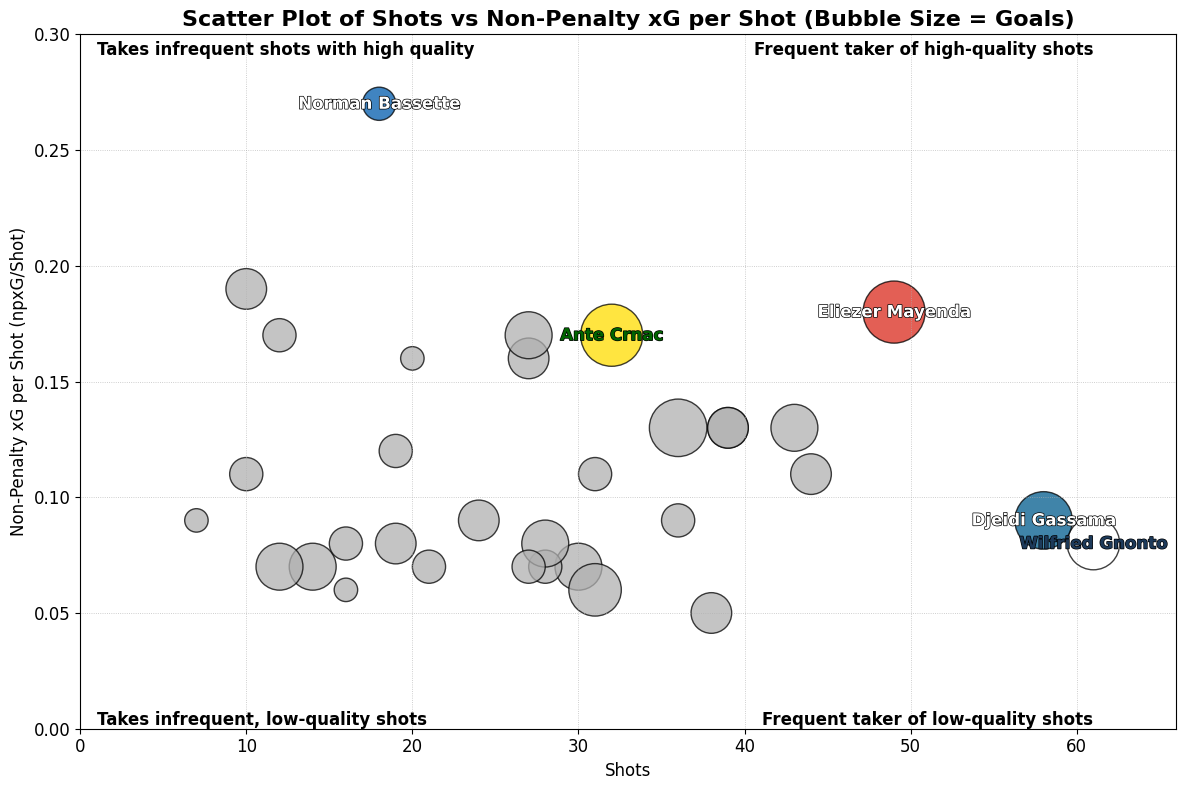

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.patches import Patch
import numpy as np

# Set the figure size
plt.figure(figsize=(12, 8))

# Normalize bubble sizes based on max goals for better scaling
max_gls = chart_data['Gls'].max()
bubble_sizes = (chart_data['Gls'] / max_gls) * 2000  # Scale dynamically

# Define highlight players and their custom colors
highlight_colors = {
    'Ante Crnac': ('#FFDD00', '#006400'),  # Norwich City - Yellow with Green Trim
    'Norman Bassette': ('#005BAC', '#FFFFFF'),  # Stade Malherbe Caen - Blue with White Trim
    'Eliezer Mayenda': ('#DA291C', '#FFFFFF'),  # Sunderland - Red with White Trim
    'Djeidi Gassama': ('#005B8C', '#FFFFFF'),  # Sheffield Wednesday - Blue with White Trim
    'Wilfried Gnonto': ('#FFFFFF', '#1D3A5A')  # Leeds United - White with Blue Trim
}

# Assign colors: Grey for non-highlighted, custom colors for highlighted players
chart_data['Color'] = chart_data['Player'].apply(lambda x: highlight_colors[x][0] if x in highlight_colors else '#B0B0B0')

# Create scatter plot with custom colors
scatter = plt.scatter(
    chart_data['Sh'], chart_data['npxG/Sh'], s=bubble_sizes,
    c=chart_data['Color'], edgecolors='black', alpha=0.75
)

# Highlight specific players with text labels in trim color with enhanced visibility
for player, (bubble_color, trim_color) in highlight_colors.items():
    player_data = chart_data.loc[chart_data['Player'] == player]
    if not player_data.empty:
        plt.text(
            player_data['Sh'].values[0], player_data['npxG/Sh'].values[0], player, 
            ha='center', va='center', fontsize=12, color=trim_color, fontweight='bold',
            path_effects=[ 
                path_effects.withStroke(linewidth=1, foreground='black'),  # Thicker outline
                # path_effects.SimpleLineShadow(offset=(1, -1), shadow_color='black', alpha=0.5)  # Slight shadow
            ]
        )

# Customize the plot for better readability
plt.title('Scatter Plot of Shots vs Non-Penalty xG per Shot (Bubble Size = Goals)', fontsize=16, fontweight='bold')
plt.xlabel('Shots', fontsize=12)
plt.ylabel('Non-Penalty xG per Shot (npxG/Shot)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve grid visibility
plt.grid(True, which='both', linestyle='dotted', linewidth=0.6, alpha=0.8)

# Set axis limits for better visualization
plt.xlim(0, chart_data['Sh'].max() + 5)
plt.ylim(0, chart_data['npxG/Sh'].max() + 0.03)

# Adding descriptive text to each corner of the scatter plot
# Top-left corner
plt.text(1, plt.gca().get_ylim()[1] * 0.99, 'Takes infrequent shots with high quality', 
         ha='left', va='top', fontsize=12, color='black', fontweight='bold')

# Top-right corner
plt.text(chart_data['Sh'].max(), plt.gca().get_ylim()[1] * 0.99, 'Frequent taker of high-quality shots', 
         ha='right', va='top', fontsize=12, color='black', fontweight='bold')

# Bottom-left corner
plt.text(1, plt.gca().get_ylim()[0] * 1.5, 'Takes infrequent, low-quality shots', 
         ha='left', va='bottom', fontsize=12, color='black', fontweight='bold')

# Bottom-right corner
plt.text(chart_data['Sh'].max(), plt.gca().get_ylim()[0] * 1, 'Frequent taker of low-quality shots', 
         ha='right', va='bottom', fontsize=12, color='black', fontweight='bold')

# Optimize layout
plt.tight_layout()
plt.show()
